In [3]:
import numpy as np

In [4]:
from sklearn.datasets import make_regression

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import SGDRegressor

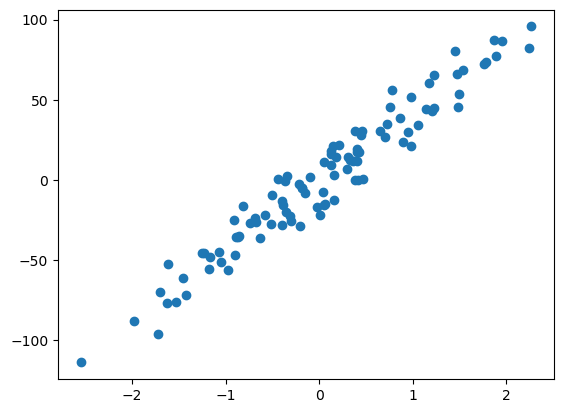

In [30]:
np.random.seed(0)
x,y = make_regression(n_samples=100, n_features=1 ,noise=10)
plt.scatter(x,y)

In [36]:
model = SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(x,y)


SGDRegressor(eta0=0.001)

Coeff R2 = 0.9416558244219535


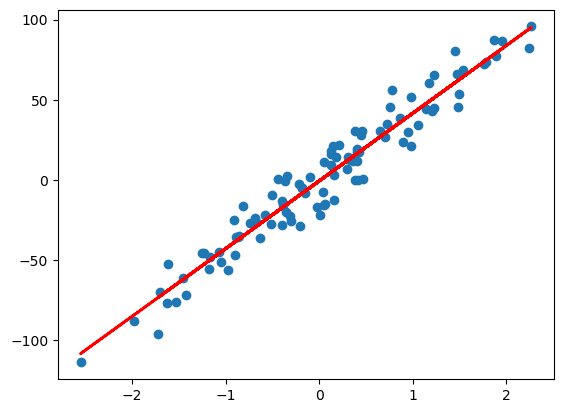

In [39]:
print('Coeff R2 =', model.score(x, y))
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='red', lw = 2)

In [40]:
from sklearn.preprocessing import PolynomialFeatures


(110, 2)

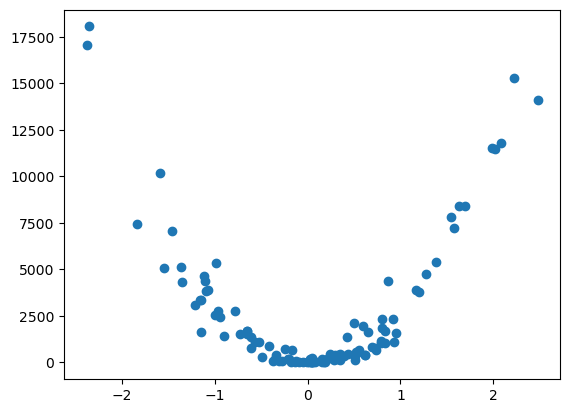

In [50]:
np.random.seed(4)
# création du Dataset
x, y = make_regression(n_samples=110, n_features=1, noise=10)
y = y**2 # y ne varie plus linéairement selon x !
# On ajoute des variables polynômiales dans notre dataset
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x = poly_features.fit_transform(x)
plt.scatter(x[:,0], y)
x.shape # la dimension de x: 100 lignes et 2 colonnes

Coeff R2 = 0.9530305606779004


/Users/fuhetienne/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


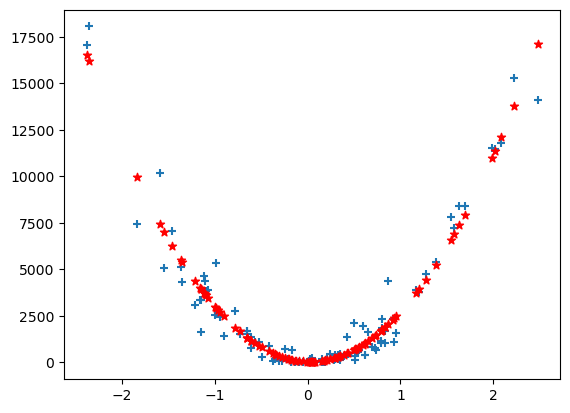

In [56]:
# On entraine le modele comme avant ! rien ne change !
model = SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(x,y)
print('Coeff R2 =', model.score(x, y))
plt.scatter(x[:,0], y, marker='+')
plt.scatter(x[:,0], model.predict(x), c='red', marker='*')

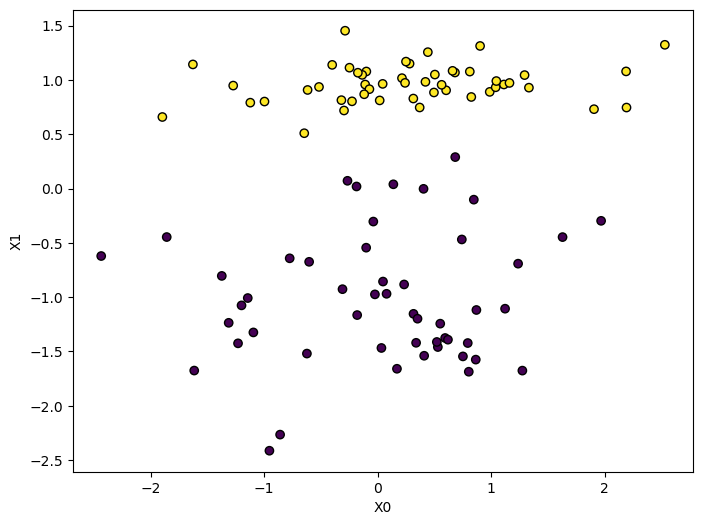

(100, 2)


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

# Génération de données aléatoires: 100 exemples, 2 classes, 2 features x0 et x1
np.random.seed(1)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

# Visualisation des données
plt.figure(num=None, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolors='k')  # Correction ici
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()  # Ajout nécessaire pour afficher le graphique
print(X.shape)  # Correction ici


In [68]:
model = SGDClassifier(max_iter=1000, eta0=0.001, loss='log')
model.fit(X, y) 

(100, 2)


/Users/fuhetienne/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


/var/folders/17/fln2vvvs40l9b1dy3hm9tq680000gn/T/ipykernel_56859/135671158.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)


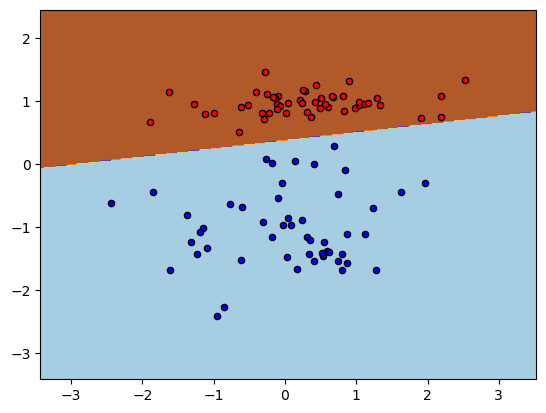

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

# Génération de données aléatoires: 100 exemples, 2 classes, 2 features x0 et x1
np.random.seed(1)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

# Création et entraînement du modèle SGDClassifier
model = SGDClassifier()
model.fit(X, y)

# Définition de la grille pour la visualisation de la décision
h = .02
colors = "bry"
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisation des contours de la décision
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Visualisation des points de données
for i, color in zip(model.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)

plt.show()


In [72]:
import numpy as np

a = np.array([1, 2, 3])
b = np.zeros((2, 3))
c = np.ones((3, 3))
d = np.arange(0, 10, 2)



In [78]:
from sklearn.datasets import load_digits

# Charger le jeu de données des chiffres manuscrits
digits = load_digits()

# Les données sont généralement stockées dans l'attribut 'data'
data = digits.data

# Les étiquettes (les chiffres réels) sont généralement stockées dans l'attribut 'target'
target = digits.target

print(digits.target)

[0 1 2 ... 8 9 8]


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

# importons une base de données de chiffre
digits = load_digits()
X = digits.data
y = digits.target
print('dimension de X:', X.shape)

dimension de X: (1797, 64)


0.9905397885364496

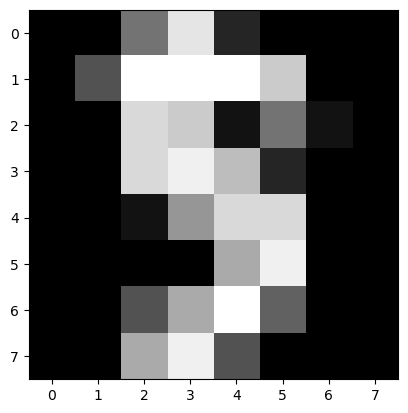

In [85]:
# visualisons un de ces chiffres
plt.imshow(digits['images'][120], cmap = 'Greys_r')
# Entraînement du modele
model = KNeighborsClassifier()
model.fit(X, y)
model.score(X, y)

array([0])

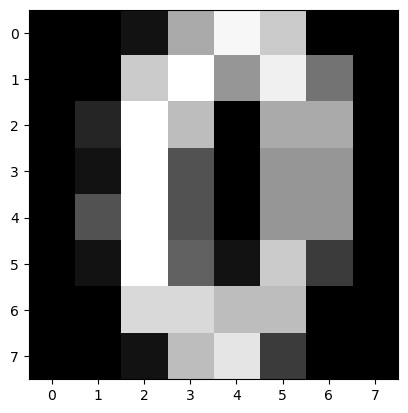

In [84]:
#Test du modele
test = digits['images'][10].reshape(1, -1)
plt.imshow(digits['images'][10], cmap = 'Greys_r')
model.predict(test)

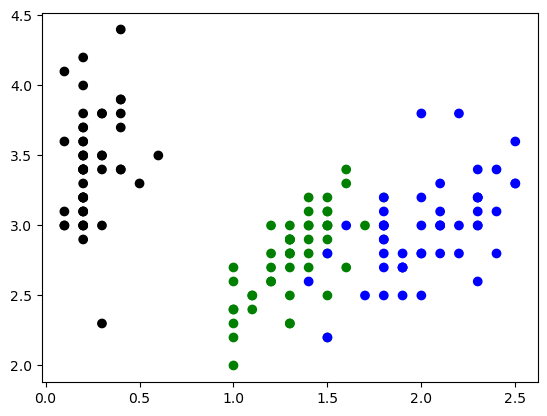

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
# charger les données
iris = load_iris()
X = iris.data
y = iris.target
X.shape # notre Dataset comprend 150 exemples et 4 variables
# Visualisation des donées
colormap=np.array(['black','green','blue'])
plt.scatter(X[:,3], X[:,1], c = colormap[y])

In [90]:
# Création du modele
model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model.fit(X, y)
model.score(X, y)

0.98